# Quenching Analysis

In this notebook, we assign the red sequence galaxies on the cluster sample.

We study:
* Red Sequence Fraction
* Phase Space

In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np

gal          = pd.read_hdf('../data/SPIDERS_Dataset.hdf5', key = 'Galaxies')#.to_numpy()
bma          = pd.read_hdf('../data/SPIDERS_Dataset.hdf5', key = 'bma')
bma.rename(columns={'CID':'key'})
gal['key'] = gal.index

Cluster_data = pd.read_hdf('../data/SPIDERS_Dataset.hdf5', key = 'Clusters')#.to_numpy()
Galaxy_data  = pd.merge(gal, bma)

In [3]:
gal = bma = 0

In [4]:
Galaxy_data

,ra,dec,specobjid,CLUS_ID,z,zErr,zWarning,v_los,cModelMag_r,cModelMagErr_r,...,gr,grerr,i,ierr,indices,iz,izerr,redshift,ri,rierr
0,119.571870,53.638738,2.105547e+18,1_1172,0.136219,0.000035,0,9112.934223,17.23507,0.005641,...,1.10030,0.010479,16.78113,0.005188,0,0.31130,0.012961,0.136219,0.45394,0.007664
1,119.864610,53.630081,2.105555e+18,1_1172,0.084383,0.000012,0,-4979.975610,16.15208,0.003694,...,0.60658,0.005445,15.57720,0.003265,1,-0.03358,0.007667,0.084383,0.57488,0.004930
2,119.796020,53.784186,2.105554e+18,1_1172,-0.000519,0.000009,0,-28062.232989,16.17832,0.004368,...,0.16302,0.005803,16.15715,0.004446,2,-0.01340,0.009050,-0.000519,0.02117,0.006233
3,119.660040,53.700200,2.105547e+18,1_1172,0.068184,0.000009,0,-9383.849868,16.73223,0.004984,...,0.62110,0.007972,16.31826,0.004628,3,0.27947,0.012491,0.068184,0.41397,0.006801
4,119.649520,53.725027,2.105548e+18,1_1172,1.050130,0.000522,0,257579.003441,18.97087,0.012989,...,0.25712,0.016552,19.05038,0.013508,4,0.00346,0.051187,1.050130,-0.07951,0.018739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62627,7.037279,26.253032,7.071983e+18,2_8798,2.197458,0.000388,0,402407.963764,19.59799,0.022725,...,0.20762,0.029524,19.50224,0.030477,62627,0.27979,0.127074,2.197458,0.09575,0.038017
62628,6.929898,26.283447,8.624534e+18,2_8798,0.207917,0.000087,0,-34519.351615,20.19131,0.050896,...,1.38378,0.107850,19.63543,0.044110,62628,0.53570,0.114635,0.207917,0.55588,0.067351
62629,7.059230,26.442574,8.624547e+18,2_8798,0.323072,0.000017,0,-9229.855950,21.58912,0.131317,...,0.67927,0.203553,21.88973,0.247275,62629,0.71348,0.645059,0.323072,-0.30061,0.279980
62630,7.062792,26.289956,7.070677e+18,2_8798,1.162802,0.000236,4,175185.001154,21.52911,0.130061,...,0.52634,0.175230,21.11993,0.117129,62630,1.23123,0.450334,1.162802,0.40918,0.175029


For the description of the cluster columns take a look at: <br>
https://data.sdss.org/datamodel/files/SPIDERS_ANALYSIS/catCluster-SPIDERS_RASS_CLUS.html <br>
https://data.sdss.org/datamodel/files/SPIDERS_ANALYSIS/SpidersXclusterBCGs.html


In [426]:
## get cluster assignment

id0   = np.loadtxt('cluster_gid.npy').astype(int)
id1   = np.loadtxt('cluster_cid.npy').astype(int)
radii = np.loadtxt('cluster_radii.npy').astype(float)

In [427]:
id0

array([   11,    47,    13, ..., 62584, 62571, 43845])

In [428]:
id1

array([  0,   0,   0, ..., 432, 432, 432])

In [429]:
radii

array([0.00110635, 0.00973226, 0.02449076, ..., 0.20916499, 0.20973541,
       0.20973541])

<AxesSubplot:>

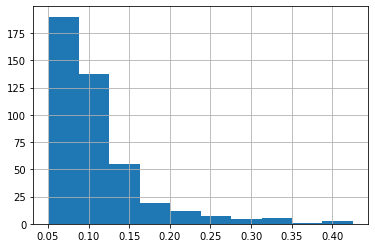

In [9]:
Cluster_data.R200C_DEG.hist()

In [10]:
Cluster_data.GAL_sdss_g_modS_C1_N

0       1.7510
1      19.9998
2       1.5593
3       6.2129
4       7.4678
        ...   
428     5.2535
429     5.6929
430     6.9246
431     4.4470
432     2.2155
Name: GAL_sdss_g_modS_C1_N, Length: 433, dtype: float32

In [11]:
list(Galaxy_data.columns)

['ra',
 'dec',
 'specobjid',
 'CLUS_ID',
 'z',
 'zErr',
 'zWarning',
 'v_los',
 'cModelMag_r',
 'cModelMagErr_r',
 'flags_r',
 'extinction_r',
 'cModelMag_g',
 'cModelMagErr_g',
 'flags_g',
 'extinction_g',
 'cModelMag_i',
 'cModelMagErr_i',
 'flags_i',
 'extinction_i',
 'cModelMag_z',
 'cModelMagErr_z',
 'flags_z',
 'extinction_z',
 'key',
 'CID',
 'best_chisq',
 'best_model',
 'best_zmet',
 'distmod',
 'gi_o',
 'gi_o_err',
 'gr_o',
 'gr_o_err',
 'iabs',
 'index',
 'iobs',
 'kii',
 'kii_err',
 'kri',
 'kri_err',
 'mass',
 'mass_err',
 'mass_weight_age',
 'mass_weight_age_err',
 'mcMass',
 'rabs',
 'ssfr',
 'ssfr_std',
 'taMass',
 'zmet',
 'gr',
 'grerr',
 'i',
 'ierr',
 'indices',
 'iz',
 'izerr',
 'redshift',
 'ri',
 'rierr']

v_los: 	Line of sight velocity of galaxy (in km/s) with respect to cluster BCG.
 	Computed as v_los = c*(1/1000)*(z_gal - z_BCG])/(1 + z_BCG)

In [12]:
Galaxy_data.columns

Index(['ra', 'dec', 'specobjid', 'CLUS_ID', 'z', 'zErr', 'zWarning', 'v_los',
       'cModelMag_r', 'cModelMagErr_r', 'flags_r', 'extinction_r',
       'cModelMag_g', 'cModelMagErr_g', 'flags_g', 'extinction_g',
       'cModelMag_i', 'cModelMagErr_i', 'flags_i', 'extinction_i',
       'cModelMag_z', 'cModelMagErr_z', 'flags_z', 'extinction_z', 'key',
       'CID', 'best_chisq', 'best_model', 'best_zmet', 'distmod', 'gi_o',
       'gi_o_err', 'gr_o', 'gr_o_err', 'iabs', 'index', 'iobs', 'kii',
       'kii_err', 'kri', 'kri_err', 'mass', 'mass_err', 'mass_weight_age',
       'mass_weight_age_err', 'mcMass', 'rabs', 'ssfr', 'ssfr_std', 'taMass',
       'zmet', 'gr', 'grerr', 'i', 'ierr', 'indices', 'iz', 'izerr',
       'redshift', 'ri', 'rierr'],
      dtype='object')

In [13]:
len(Galaxy_data)/len(Cluster_data)

144.64665127020785

Text(0.5, 0, 'redshift')

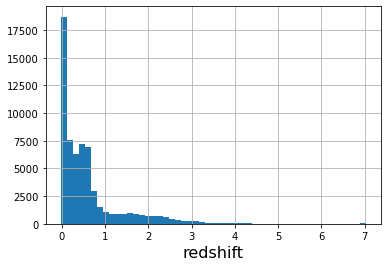

In [14]:
Galaxy_data.z.hist(bins=51)
plt.xlabel('redshift',fontsize=16)

Text(0.5, 0, 'redshift')

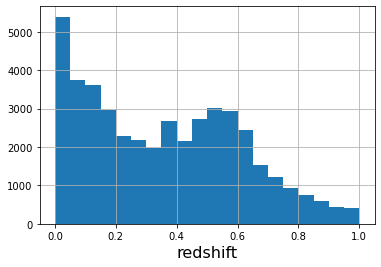

In [15]:
Galaxy_data.z.hist(bins=np.linspace(0.,1.,21))
plt.xlabel('redshift',fontsize=16)

Text(0.5, 0, 'redshift')

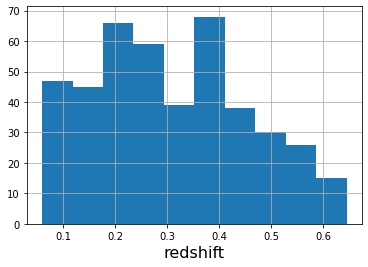

In [16]:
Cluster_data.Z_LAMBDA.hist()
plt.xlabel('redshift',fontsize=16)

Text(0.5, 0, 'v_los')

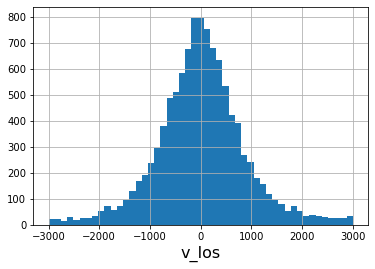

In [17]:
Galaxy_data.v_los.hist(bins=np.linspace(-3000.,3000.))
plt.xlabel('v_los',fontsize=16)

In [258]:
path = '/Users/jesteves/Documents/repos/red-dragon-gamma'

import sys
sys.path.append(path)


import rd_gamma as redDragon

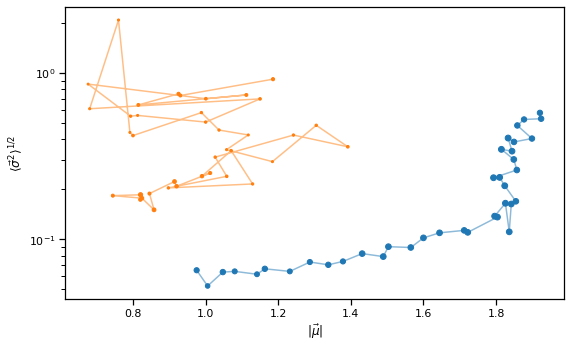

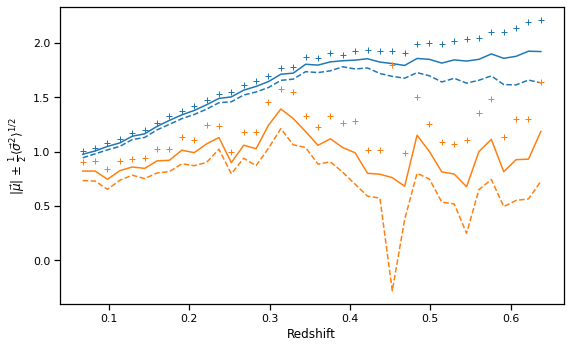

In [417]:
rd = redDragon.dragon('../data/out_2K_amag_20.8.h5',factor=-10.)
redDragon.plot_WMS(rd)

In [418]:
filters = ['g','r','i','z']

Z     = Galaxy_data.z.to_numpy()[id0]
bands = np.vstack([Galaxy_data['cModelMag_%s'%(bi)].to_numpy()[id0] - Galaxy_data['extinction_%s'%(bi)].to_numpy()[id0]  for bi in filters]).T

In [419]:
pred = rd.P_red(Z,bands).astype(float)
pred[np.isnan(pred)] = 0.

rmask= pred>0.5

/usr/local/anaconda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/anaconda/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/anaconda/lib/python3.8/site-packages/numpy/linalg/linalg.py:2098: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
/Users/jesteves/Documents/repos/red-dragon-gamma/rd_gamma.py:452: RuntimeWarning: overflow encountered in exp
  denominator = np.sum(np.exp(logLs),axis=0)
/Users/jesteves/Documents/repos/red-dragon-gamma/rd_gamma.py:454: RuntimeWarning: overflow encountered in exp
  return np.array([np.exp(logLs[ii])/denominator \
/Users/jesteves/Documents/repos/red-dragon-gamma/rd_gamma.py:454: RuntimeWarning: invalid value encountered in true_divide
  return np.array([np.exp(l

In [420]:
help(rd)

Help on dragon in module rd_gamma object:

class dragon(builtins.object)
 |  dragon(fname, factor=0.5)
 |  
 |  rd = dragon('input.h5')
 |  rd.P_red(Z,bands)
 |  
 |  # back-end tools:
 |  rd.covar(Z)
 |  
 |  Methods defined here:
 |  
 |  P_red(self, Z, bands, bands_err=None)
 |  
 |  __init__(self, fname, factor=0.5)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __str__(self)
 |      Return str(self).
 |  
 |  get_P(self, Z, bands, bands_err=None)
 |  
 |  get_WMS(self)
 |      get {weights, colors, scatters}, summed across colors
 |  
 |  get_corr(self, Z)
 |      return correlation matrix for given redshift(s)
 |  
 |  get_covars(self, Z)
 |      returns covariance matrix for given redshift(s)
 |  
 |  get_gmm(self, Z)
 |  
 |  get_logL(self, Z, bands, bands_err=None, dZ=0.01)
 |      returns likelihoods for each component given redshifts, bands, err
 |      
 |      get_logL(Z,bands,bands_err=None,dZ=.01):
 |      Z : median redshift or redshift 

Color Analysis
---------------------------------------

First step investigating the color distribution

In [421]:
import sys
import os
sys.path.append(os.path.abspath("/home/johnny/Documents/2ndPhase/ccopa_mag/bma/"))

from astropy.table import Table

# import gaussianKDE as kde
# from colorModeling import *

In [422]:
cat = Table.from_pandas(Cluster_data.iloc[np.unique(id1)])
cat['CID'] = np.unique(id1)
rmax       = Cluster_data.R200C_DEG.to_numpy()

cat.rename_column('Z_LAMBDA','redshift')

In [423]:
gal        = Table.from_pandas(Galaxy_data.iloc[id0])
gal['CID'] = id1

In [430]:
gal['redshift'] = np.array(cat['redshift'][id1])
gal['Rnorm']    = radii/rmax[id1]
#gal['cut']      = cut

In [431]:
gal['mag']    = np.array([gal['cModelMag_%s'%li] for li in ['g','r','i','z']]).T
gal['magerr'] = np.array([gal['cModelMagErr_%s'%li] for li in ['g','r','i','z']]).T

In [432]:
# ### defining color variables
# color_list = ['gr','ri','iz']
# ecolor_list = [ci+'_err' for ci in color_list]

# color_value = [(0,1),(1,2),(2,3)]
# mag_list = [1,2,3]
# gal = set_color_variables(gal,color_list,ecolor_list,color_value)

In [433]:
filters = ['g','r','i','z']

Z     = gal['z']
bands = np.vstack([gal['cModelMag_%s'%(bi)]- gal['extinction_%s'%(bi)]  for bi in filters]).T

pred = rd.P_red(Z,bands).astype(float)
pred[np.isnan(pred)] = 0.

/usr/local/anaconda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3417: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [434]:
gal['Pred'] = pred
gal['red']  = (pred>.5).astype(int)

In [435]:
zmin,zmax = 0.06, 0.365
zcut = (gal['redshift']>=zmin)&(gal['redshift']<=zmax)

gal = gal[zcut]

In [452]:
#vlos = Galaxy_data.v_los.to_numpy()[id0[zcut]]
# c = 3e8 ## m/s
# def compute_vlos(z_gal,z_BCG):
#     return c*(1/1000)*(z_gal - z_BCG)/(1 + z_BCG)

# vlos = compute_vlos(gal['z'],gal['redshift'])
# gal['vlos'] = vlos

mcut = gal['rabs']<=-20.8

vlos = gal['v_los']
cut  = (np.abs(vlos)<1500.)&(np.abs(gal['z']-gal['redshift'])<=0.01)
cut &= mcut

In [453]:
z_cls       = np.array(cat['redshift'])
ids_cls     = cat['CID']
ids_cls_gal = gal['CID']

In [454]:
cutr = cut&(gal['Rnorm']<=1.)
indicies_unique = list(chunks(ids_cls_gal[cutr],ids_cls))         ## per cluster

In [455]:
np.count_nonzero(cut)

4257

In [490]:
save='../results/27Jun/'

## Frações de datas
def fracaoRedBlue(data,bin_width=0.10,col='Rnorm',label='Pred'):
    bin1 = np.trunc(data[col]/bin_width)
    data_bin = data.group_by(bin1)

    xbin = (data_bin.groups.keys+1/2)*bin_width ## xbins
    Total= np.array(data_bin[label].groups.aggregate(np.size))
    red  = np.array(data_bin[label].groups.aggregate(np.sum))
    blue = Total-red
    
    fred = red/Total
    fblue = blue/Total
    print('total:',Total)
    print('red  :',np.round(red,2))
    return fred, fblue, red, blue, xbin

def poissonError(Nred,Nblue):
    A = ( np.sqrt(Nred)/(Nred+Nblue) + Nred/(Nred+Nblue)**(3/2) )
    B = ( np.sqrt(Nblue)/(Nred+Nblue) + Nblue/(Nred+Nblue)**(3/2) )
    return A,B

def plotFraction(gc,bin_width=0.25,title=None,label='Pred',col='Rnorm',xlabel=r'$R \; [R_{500}] $'):
    
    fred,fblue,Nred,Nblue,radii = fracaoRedBlue(gc,bin_width=bin_width,col=col,label=label)
    
    erry_red, erry_blue = poissonError(Nred,Nblue)
#     erry_red, erry_blue = 0.01,0.01
    plt.clf()
    plt.figure(figsize=(8,5))

    plt.errorbar(radii,fred,xerr=bin_width/2,yerr=erry_red,marker='o',color='r',label=r'$f_{red}$')
    plt.errorbar(radii*1.01,fblue,xerr=bin_width/2,yerr=erry_blue,marker='o',color='b',label=r'$f_{blue}$')
    plt.legend()
    plt.ylabel('Fraction')
    plt.xlabel(xlabel)
#     plt.ylim(0.,1.)
    if title is not None:
        plt.title(title)

total: [ 893 1159  802  522  294  232  148  137   70]
red  : [649.73 812.08 523.18 322.09 179.35 139.55  93.05  73.15  37.1 ]


<Figure size 582.492x360 with 0 Axes>

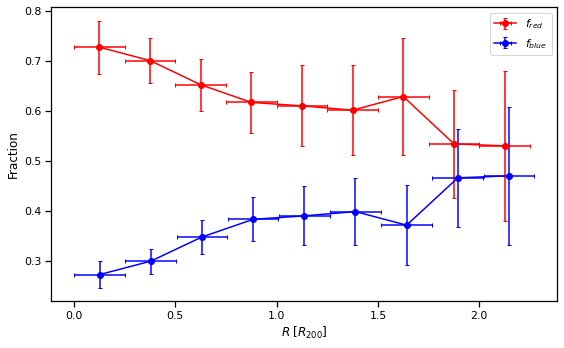

In [491]:
plotFraction(gal[cut],bin_width=0.25,title=None,label='Pred',col='Rnorm',xlabel=r'$R \; [R_{200}] $')

total: [305 898 892 598 437 165  81]
red  : [207.72 627.5  599.66 395.76 328.4   91.61  56.42]


<Figure size 582.492x360 with 0 Axes>

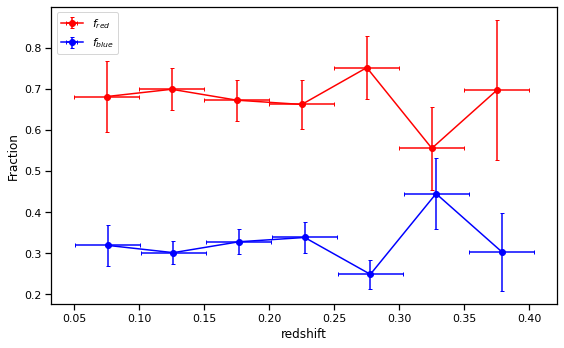

In [492]:
plotFraction(gal[cutr],bin_width=0.05,title=None,label='Pred',col='redshift',xlabel=r'redshift')

In [459]:
def get_plot_dict(gal):
    red  = gal['Pred']>0.5
    pred = gal['Pred']
    radii= gal['Rnorm']
    vlos = gal['v_los']
    mydict = {'x':radii,'y':vlos,'red':red}
    df = pd.DataFrame.from_dict(mydict)
    return df

In [460]:
import seaborn as sns
sns.set_context('notebook')

In [461]:
df = get_plot_dict(gal[cut])

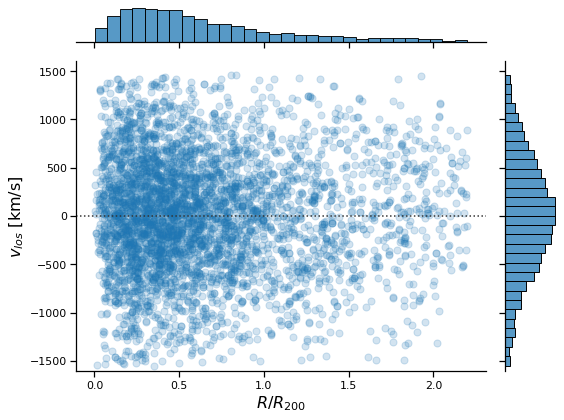

In [462]:
ax = sns.jointplot(data=df,x='x', y='y', kind="resid", space=0, height=6, ratio=6, ylim=(-1600.,1600.), joint_kws = {'scatter_kws':dict(alpha=0.2,s=50)})
ax.set_axis_labels(r'$R/R_{200}$', r'$v_{los}$ [km/s]', fontsize=16)
ax.fig.set_figwidth(8)

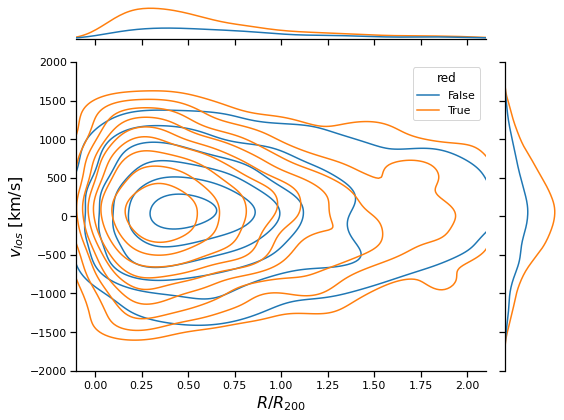

In [463]:
ax = sns.jointplot(data=df,x='x', y='y', hue='red', kind='kde', space=0, height=6, ratio=6, ylim=(-2000.,2000.),xlim=(-0.1,2.1))
ax.set_axis_labels(r'$R/R_{200}$', r'$v_{los}$ [km/s]', fontsize=16)
ax.fig.set_figwidth(8)

In [464]:
zcls = gal['redshift']

In [465]:
def make_bins(x,xbins):
    indices = []
    xmd     = 0.5*(xbins[1:]+xbins[:-1])
    for xl,xh in zip(xbins[:-1],xbins[1:]):
        w, = np.where((x<=xh)&(x>xl))
        indices.append(w)
    return indices,xmd

In [466]:
#zbins = np.percentile(zcls[cut],np.linspace(0,100,6))
zbins = np.arange(0.066,0.365+0.05,0.05)
keys, zmed = make_bins(zcls,zbins)

zlabel = ['%.3f < z < %.3f'%(zl,zh) for zl,zh in zip(zbins[:-1],zbins[1:])]

In [467]:
keys

[array([    0,     1,     2, ..., 53026, 53027, 53028]),
 array([  565,   566,   567, ..., 50495, 50496, 50497]),
 array([  416,   417,   418, ..., 52565, 52566, 52567]),
 array([  820,   821,   822, ..., 51917, 51918, 51919]),
 array([  274,   275,   276, ..., 51008, 51009, 51010]),
 array([ 2817,  2818,  2819, ..., 52666, 52667, 52668])]

In [468]:
zbins

array([0.066, 0.116, 0.166, 0.216, 0.266, 0.316, 0.366])

0.066 < z < 0.116
0.116 < z < 0.166
0.166 < z < 0.216
0.216 < z < 0.266
0.266 < z < 0.316
0.316 < z < 0.366


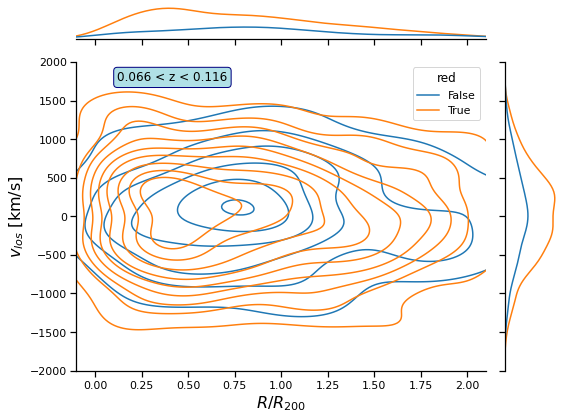

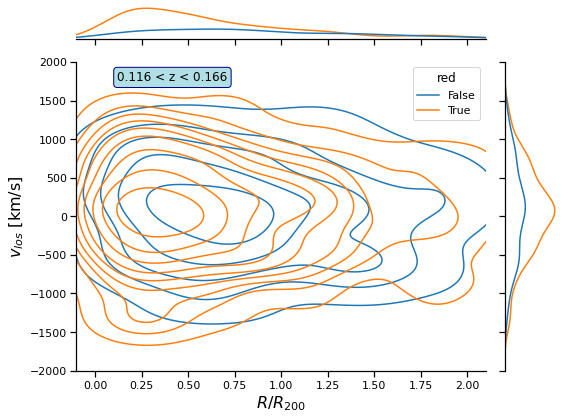

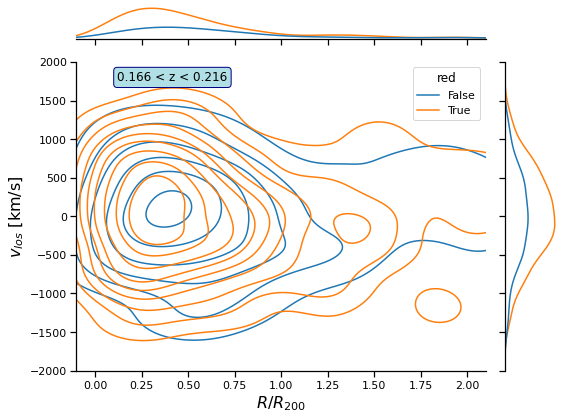

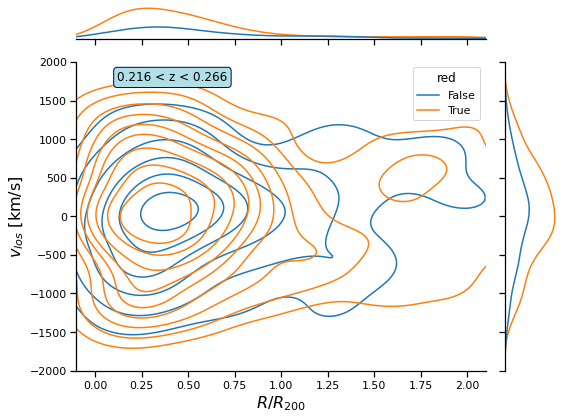

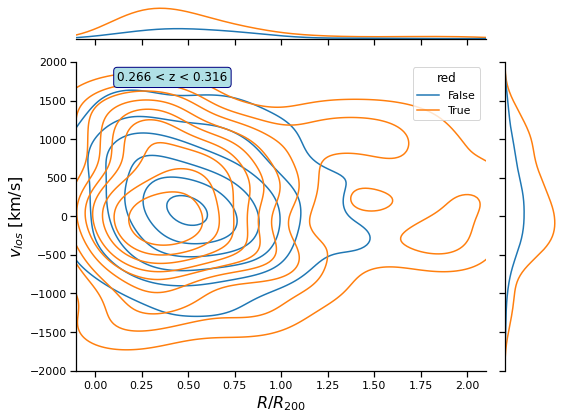

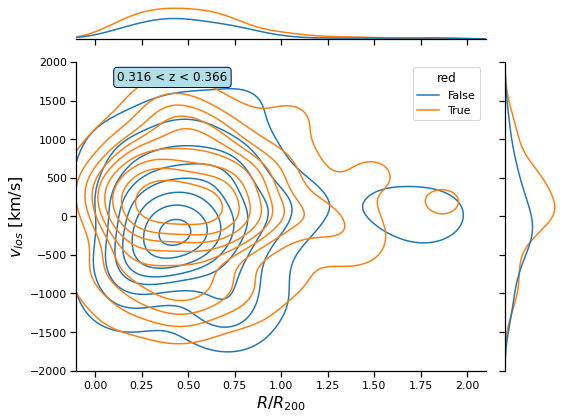

In [469]:
for i,ix in enumerate(keys):
    print(zlabel[i])
    df = get_plot_dict(gal[ix[cut[ix]]])
    ax = sns.jointplot(data=df,x='x', y='y', hue='red', kind='kde', space=0, height=6, ratio=6, ylim=(-2000.,2000.),xlim=(-0.1,2.1))
    ax.set_axis_labels(r'$R/R_{200}$', r'$v_{los}$ [km/s]', fontsize=16)
    #plt.text(0., 1800., zlabel[i], horizontalalignment='left', size='medium', color='black', weight='semibold')
    ax.ax_joint.annotate(zlabel[i],
                        xy=(0.1, 0.95), xycoords='axes fraction',
                        ha='left', va='center',
                        bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'})
    ax.fig.set_figwidth(8)

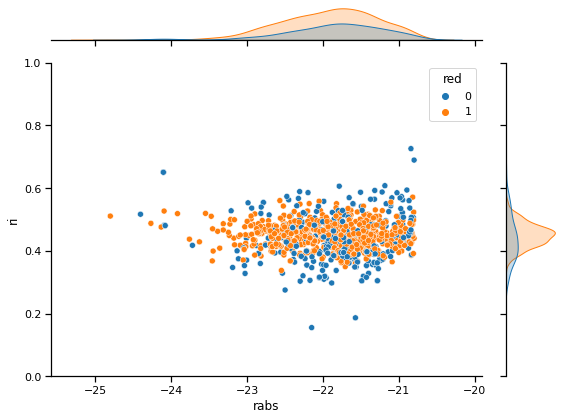

In [486]:
idx =keys[1][cut[keys[1]]]
ax = sns.jointplot(x=gal['rabs'][idx], y=gal['ri'][idx], hue=gal['red'][idx],ylim=(0.,1.), space=0, height=6, ratio=6)
#ax.set_axis_labels(r'$R/R_{200}$', r'$v_{los}$ [km/s]', fontsize=16)
ax.fig.set_figwidth(8)

In [45]:
def chunks(ids1, ids2):
    """Yield successive n-sized chunks from data"""
    for id in ids2:
        w, = np.where( ids1==id )
        yield w
    pass

def fitPoly(x,y,x_new,norder=3):
    z = np.polyfit(x, y, norder)
    zp = np.poly1d(z)
    y_new = zp(x_new)
    
    y_new = np.where(y_new<0.,0.,y_new)
    return y_new

def makeBins(variable,xedges):
    xbins = (xedges[1:]+xedges[:-1])/2
    indices = [ np.where((variable >= xedges[i]) & (variable <= xedges[i + 1]))[0] for i in range(len(xedges)-1)]
    return indices, xbins

def get_RS_flag(gal,gmm_parameters,nsigma=2,color_list=['g-r']):
    zcls = gal['z']
    z = gmm_parameters['redshift']
    
    gal['rs_flag'] = np.zeros_like(gal['mag'][:,1:],dtype=int)
    vec = np.zeros_like(gal['mag'][:,1:],dtype=int)
    
    gal['dcolor'] = np.zeros_like(gal['mag'][:,1:],dtype=float)
    
    pmem = gal["Pmem"]
    for j,li in enumerate(color_list):
        color = gal[li]
        
        zrs = gmm_parameters['redshift']
        mur = gmm_parameters['rs_param_%s'%(li)][:,0]
        sigr = gmm_parameters['rs_param_%s'%(li)][:,1]
        
        mur2 = fitPoly(zrs,mur,zrs)
        sigr2 = fitPoly(zrs,sigr,zrs)
        
        w, = np.where(sigr<1e-2)
        sigr[w] = sigr2[w]
        
        w, = np.where(np.abs(mur-mur2)>2*sigr)
        sigr[w] = sigr2[w]
        
        cb_upper = mur+nsigma*sigr
        cb_lower = mur-nsigma*sigr
        
        indices = list(chunks(gal['CID'], gmm_parameters['CID']))
        for i,idx in enumerate(indices):
            gal['rs_flag'][idx,j] = np.where((color[idx]<=cb_upper[i])&(color[idx]>=cb_lower[i]),int(1),int(0))
            vec[idx,j] = np.where((color[idx]>=cb_upper[i]),1,0)
            gal['dcolor'][idx,j] = color[idx]-mur[i]
        
        gal['rs_bad'] = np.sum(vec,axis=1)
        gal['red_score'] = np.sum(gal["rs_flag"],axis=1)
    return gal

In [47]:
color_list = ['gr','ri','iz']
color_label= [r'(%s-%s)'%(li[0],li[1]) for li in color_list]
z_label = 'redshift'

zbins = np.arange(0.05,0.65,0.05)
print("# color label:")
print(color_label)

# color label:
['(g-r)', '(r-i)', '(i-z)']


In [ ]:
def set_new_col(gal,columns,val=0):
    for col in columns:
        gal[col] = val
    return gal

## get red sequence flag for all colors in color_list
nsigma=3
gal = get_RS_flag(gal,gmm_parameters,nsigma=nsigma,color_list=color_list)

In [ ]:
## Color Model: GMM

In [ ]:
from scipy import interpolate
import scipy.stats as st
from scipy.interpolate import interp1d

def interpData(x,y,x_new):
    out = interp1d(x, y, kind='cubic', fill_value='extrapolate')
    return out(x_new)

def interpDataBinned(x,y,x_edges,x_new):
    keys,x_bin = makeBins(x,x_edges)
    y_bin = np.array([ np.nanmedian(y[idx]) for idx in keys])
    y_new = interpData(x_bin,y_bin,x_new)    
    return y_new

def get_color_model(gmm,zbins):
    """ It gets the mean of the GMM parameters
    """
    gmm_new = gmm.copy()
    zcls=np.array(gmm['redshift'])
    
    for cl in color_list:
        gmm_rs = np.array(gmm['rs_param_%s'%cl][:,0])
        gmm_bc = np.array(gmm['bc_param_%s'%cl][:,0])
        
        gmm_rs_sig = np.array(gmm['rs_param_%s'%cl][:,1])
        gmm_bc_sig = np.array(gmm['bc_param_%s'%cl][:,1])
        
        gmm_rs_alp = gmm['rs_param_%s'%cl][:,2]
        gmm_bc_alp = gmm['bc_param_%s'%cl][:,2]
        
        gmm_rs_new = interpDataBinned(zcls,gmm_rs,zbins,zcls)
        gmm_bc_new = interpDataBinned(zcls,gmm_bc,zbins,zcls)
        
        gmm_rs_sig_new = fitPoly(zcls,gmm_rs_sig,zcls)
        gmm_bc_sig_new = fitPoly(zcls,gmm_bc_sig,zcls)
        
        gmm_rs_alp_new = fitPoly(zcls,gmm_rs_alp,zcls)
        gmm_bc_alp_new = fitPoly(zcls,gmm_bc_alp,zcls)
        
        
        gmm_new['rs_param_%s'%cl][:,0] = gmm_rs_new
        gmm_new['bc_param_%s'%cl][:,0] = gmm_bc_new
        
        gmm_new['rs_param_%s'%cl][:,1] = gmm_rs_sig_new
        gmm_new['bc_param_%s'%cl][:,1] = gmm_bc_sig_new
        
        gmm_new['rs_param_%s'%cl][:,2] = gmm_rs_alp_new
        gmm_new['bc_param_%s'%cl][:,2] = gmm_bc_alp_new
        
    return gmm_new

In [ ]:
gmm = gmm_parameters

In [ ]:
zcls = gmm_parameters['redshift']
zbins = np.arange(0.05,0.7,0.05)

## get a new GMM model
gmm_new = get_color_model(gmm,zbins)

print("redshift bins: width=0.075")
print(zbins)

In [ ]:
## Mean Color
from aux_functions import validating_color_model_grid

validating_color_model_grid(gmm,gmm_new,color_list,lcolor=color_label)
plt.xlim(0.,0.6)
plt.suptitle("Mean Color",fontsize=24)
plt.savefig("gmm_color_model_mean_color.png",bb_box="tight")

In [ ]:
## Width
mask = (gmm['bc_param_gr'][:,1]>0.)&(gmm['bc_param_ri'][:,1]>0.)&(gmm['bc_param_iz'][:,1]>0.)
validating_color_model_grid(gmm[mask],gmm_new,color_list,lcolor=color_label,sigma=True)
plt.suptitle("Width",fontsize=24)
plt.savefig("gmm_color_model_width_color.png",bb_box="tight")

In [ ]:
## Weights
mask = (gmm['bc_param_gr'][:,1]>0.)&(gmm['bc_param_ri'][:,1]>0.)&(gmm['bc_param_iz'][:,1]>0.)
validating_color_model_grid(gmm[mask],gmm_new,color_list,lcolor=color_label,fraction=True)
plt.suptitle("Weights",fontsize=24)
plt.savefig("gmm_color_model_wights_color.png",bb_box="tight")

In [ ]:
def set_new_col(gal,columns,val=0):
    for col in columns:
        gal[col] = val
    return gal

## get red sequence flag for all colors in color_list
nsigma=2
gal = get_RS_flag(gal,gmm_new,nsigma=nsigma,color_list=color_list)

In [54]:
def print_red_fractions(g):
    ntotal = len(g['CID'])
    print("# red sequence fraction")
    for i,li in enumerate(color_label):
        nrs = np.nansum(g["Pmem"])
        print('  %s : %.2f'%(li,nrs/ntotal))
    pass

In [55]:
w, = np.where(gal['redshift']<0.35)
print("galaxies with z<0.35")
print_red_fractions(gal[w])

galaxies with z<0.35
# red sequence fraction
  (g-r) : 0.29
  (r-i) : 0.29
  (i-z) : 0.29


In [56]:
w, = np.where((gal['redshift']>0.35)&(gal['redshift']<0.65))
print("galaxies with 0.35< z < 0.65")
print_red_fractions(gal[w])

galaxies with 0.35< z < 0.65
# red sequence fraction
  (g-r) : 0.33
  (r-i) : 0.33
  (i-z) : 0.33


In [63]:
def plot_rs_fraction(gal):
    zgal=gal["redshift"]
    keys,zmeans = makeBins(zgal,zbins)
    rs_frac = np.array([np.nansum(gal['Pmem'][idx],axis=0)/len(idx) for idx in keys])
    
    #rs_score = compute_red_score(gal)#np.where(np.sum(gal["rs_flag"],axis=1)>=3,1,0)
    #rs_frac_score = np.array([np.sum(rs_score[idx])/len(idx) for idx in keys])
    
    plt.figure(figsize=(8,6))
#     for i,li in enumerate(color_label):
#         plt.plot(zmeans,rs_frac[:,i])
#         plt.scatter(zmeans,rs_frac[:,i],label=li)
    
    #plt.plot(zmeans,rs_frac_score,color='k')
    #plt.scatter(zmeans,rs_frac_score,color='k',label='RS selection')

    plt.axvline(0.35,color='gray',linestyle='--')
#     plt.axvline(0.7,color='gray',linestyle='--')

    plt.ylabel(r'$f_{RS}$',fontsize=24)
    plt.xlabel(z_label)
#     plt.ylim(0.35,1.)
    plt.legend()

In [64]:

# ## 4000 Ang break
# ## 0.35, 0.69, 1.06 - g, r, i bands
# w1, = np.where(zrs<=0.35)
# w2, = np.where((zrs<=0.35)&(zrs<=0.69))
# w3, = np.where((zrs<=0.69)&(zrs<=1.06))

# rs_score = np.sum(gal["rs_flag"],axis=1)

In [65]:
field = vlos>3000.

No handles with labels found to put in legend.
No handles with labels found to put in legend.


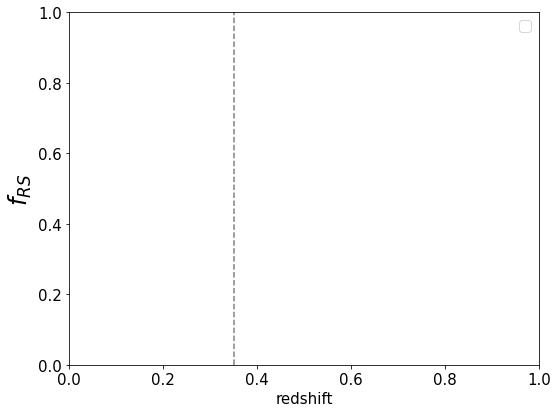

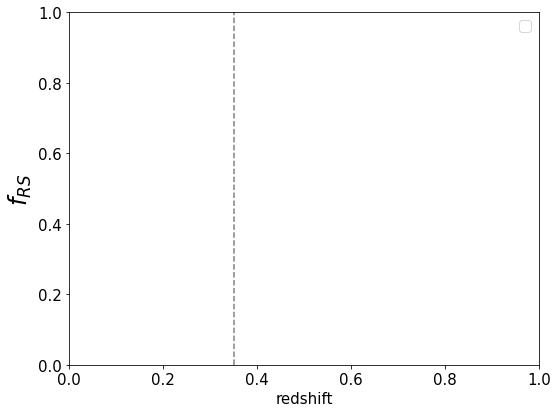

In [66]:
plot_rs_fraction(gal[cut])
plot_rs_fraction(gal[field])
#plt.savefig('red_sequence_fraction.png')

In [ ]:
def plot_rs_profile(gal,rbins=np.linspace(0.,2.0,11)):
    radii=gal["Rnorm"]
    keys,rmeans = makeBins(radii,rbins)
    rs_frac = np.array([np.sum(gal['rs_flag'][idx],axis=0)/len(idx) for idx in keys])
    
    #rs_score = compute_red_score(gal)#np.where(np.sum(gal["rs_flag"],axis=1)>=3,1,0)
    #rs_frac_score = np.array([np.sum(rs_score[idx])/len(idx) for idx in keys])
    
    plt.figure(figsize=(8,6))
    for i,li in enumerate(color_label):
        plt.plot(rmeans,rs_frac[:,i])
        plt.scatter(rmeans,rs_frac[:,i],label=li)
    
    #plt.plot(zmeans,rs_frac_score,color='k')
    #plt.scatter(zmeans,rs_frac_score,color='k',label='RS selection')

#     plt.axvline(0.35,color='gray',linestyle='--')
#     plt.axvline(0.7,color='gray',linestyle='--')

    plt.ylabel(r'$f_{RS}$',fontsize=24)
    plt.xlabel(rlabel,fontsize=20)
#     plt.ylim(0.35,1.)
    plt.legend()

In [ ]:
cut2 = cut&(gal['redshift']<0.65)

In [ ]:
plot_rs_profile(gal[cut2])
plot_rs_profile(gal[field])

In [ ]:
rs_flag = gal['rs_flag'][:,0]

In [ ]:
# def plot_phase_space():
plt.scatter(rnorm[cut2][::5],vlos[cut2][::5],c=rs_flag[cut2][::5],alpha=0.3,s=20,cmap='jet')
plt.xlabel(r'$R/R_{200}$',fontsize=16)
plt.ylabel(r'$v_{los}$ [km/s]',fontsize=16)